# FilenameDater -- Utility
This program reads the files in a directory, parses the filename in the format of NameYearMonthDate and then sets the file access and modification date to the last day of the month or the day specified.

Purpose is to correctly sort files in time as sometimes they are saved out of order or in the wrong month.

>>> import datetime, time
>>> dt = datetime.datetime(2011, 10, 21, 0, 0)
>>> s = time.mktime(dt.timetuple())
>>> s

os.utime(path, times=None, *, [ns, ]dir_fd=None, follow_symlinks=True)
Set the access and modified times of the file specified by path.

utime() takes two optional parameters, times and ns. These specify the times set on path and are used as follows:

If ns is specified, it must be a 2-tuple of the form (atime_ns, mtime_ns) where each member is an int expressing nanoseconds.
If times is not None, it must be a 2-tuple of the form (atime, mtime) where each member is an int or float expressing seconds.
If times is None and ns is unspecified, this is equivalent to specifying ns=(atime_ns, mtime_ns) where both times are the current time.
It is an error to specify tuples for both times and ns.

Whether a directory can be given for path depends on whether the operating system implements directories as files (for example, Windows does not). Note that the exact times you set here may not be returned by a subsequent stat() call, depending on the resolution with which your operating system records access and modification times; see stat(). The best way to preserve exact times is to use the st_atime_ns and st_mtime_ns fields from the os.stat() result object with the ns parameter to utime.

This function can support specifying a file descriptor, paths relative to directory descriptors and not following symlinks.

New in version 3.3: Added support for specifying an open file descriptor for path, and the dir_fd, follow_symlinks, and ns parameters.

Changed in version 3.6: Accepts a path-like object.

In [1]:
import os
statinfo = os.stat('/Users/dwormuth/Documents/Money/General/CC/BJ1709.pdf')
statinfo
statinfo.st_atime

1507417219.0

In [2]:
statinfo

os.stat_result(st_mode=33188, st_ino=16704094, st_dev=16777220, st_nlink=1, st_uid=502, st_gid=20, st_size=904187, st_atime=1507417219, st_mtime=1506307638, st_ctime=1507387221)

In [6]:
from os import scandir
path = '/Users/dwormuth/Documents/Money/General/CC/'
with os.scandir('/Users/dwormuth/Documents/Money/General/CC/') as it:
    for entry in it:
        if not entry.name.startswith('.') and entry.is_file():
            print(entry.name)

AttributeError: __exit__

In [10]:
from os import scandir
with os.scandir() as it:
    for entry in it:
        if not entry.name.startswith('.') and entry.is_file():
            print(entry.name)

AttributeError: __exit__

In [15]:
import os
 
folders = []
files = []
 
for entry in os.scandir('/Users/dwormuth/Documents/Money/General/CC'):
    if entry.is_dir():
        folders.append(entry.path)
    elif entry.is_file():
        files.append(entry.path)
 
print('Files:')
print(files)

Files:
['/Users/dwormuth/Documents/Money/General/CC/.DS_Store', '/Users/dwormuth/Documents/Money/General/CC/20071105ATT_NewPIN.pdf', '/Users/dwormuth/Documents/Money/General/CC/20080516065100.pdf', '/Users/dwormuth/Documents/Money/General/CC/20080720203514.pdf', '/Users/dwormuth/Documents/Money/General/CC/20080807084923.pdf', '/Users/dwormuth/Documents/Money/General/CC/20080808062050.pdf', '/Users/dwormuth/Documents/Money/General/CC/20080808065224.pdf', '/Users/dwormuth/Documents/Money/General/CC/20081015094904.pdf', '/Users/dwormuth/Documents/Money/General/CC/20081230054338.pdf', '/Users/dwormuth/Documents/Money/General/CC/20090209204539.pdf', '/Users/dwormuth/Documents/Money/General/CC/20090214032708 1.pdf', '/Users/dwormuth/Documents/Money/General/CC/20090219214150.pdf', '/Users/dwormuth/Documents/Money/General/CC/20090508001102.pdf', '/Users/dwormuth/Documents/Money/General/CC/20090519071227.pdf', '/Users/dwormuth/Documents/Money/General/CC/20090523170023.pdf', '/Users/dwormuth/Doc

/Users/dwormuth/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


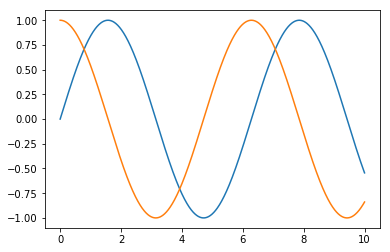

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,10,1000)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

In [19]:
x

array([  0.        ,   0.01001001,   0.02002002,   0.03003003,
         0.04004004,   0.05005005,   0.06006006,   0.07007007,
         0.08008008,   0.09009009,   0.1001001 ,   0.11011011,
         0.12012012,   0.13013013,   0.14014014,   0.15015015,
         0.16016016,   0.17017017,   0.18018018,   0.19019019,
         0.2002002 ,   0.21021021,   0.22022022,   0.23023023,
         0.24024024,   0.25025025,   0.26026026,   0.27027027,
         0.28028028,   0.29029029,   0.3003003 ,   0.31031031,
         0.32032032,   0.33033033,   0.34034034,   0.35035035,
         0.36036036,   0.37037037,   0.38038038,   0.39039039,
         0.4004004 ,   0.41041041,   0.42042042,   0.43043043,
         0.44044044,   0.45045045,   0.46046046,   0.47047047,
         0.48048048,   0.49049049,   0.5005005 ,   0.51051051,
         0.52052052,   0.53053053,   0.54054054,   0.55055055,
         0.56056056,   0.57057057,   0.58058058,   0.59059059,
         0.6006006 ,   0.61061061,   0.62062062,   0.63

In [38]:
import os
 
folders = []
files = []
 
for entry in os.scandir('/Users/dwormuth/Documents/Money/General/CC'):
    if entry.is_dir():
        folders.append(entry.path)
    elif entry.is_file():
        files.append(entry.name)
        x = entry.stat().st_mtime
        print(x)
        #files.append(x.st_mtime)
 
print('Files:')
print(files)

1501865821.0
1194320219.0
1210935116.0
1216600516.0
1218113370.0
1218190852.0
1218192745.0
1224078545.0
1230633821.0
1234230340.0
1234600033.0
1235097712.0
1241755866.0
1242731548.0
1243112425.0
1250297509.0
1250297633.0
1251408538.0
1251409571.0
1251409585.0
1251409657.0
1251409677.0
1251825473.0
1252063674.0
1252063714.0
1253883616.0
1255660007.0
1256081633.0
1256081974.0
1256082651.0
1256082649.0
1256082348.0
1256082394.0
1257135592.0
1257902248.0
1261820377.0
1264915336.0
1265548754.0
1265581156.0
1265581142.0
1265581127.0
1269230488.0
1270266433.0
1276446854.0
1276447237.0
1281537404.0
1283024018.0
1285343666.0
1286154012.0
1286154465.0
1287243053.0
1288310986.0
1288311004.0
1289656095.0
1289656037.0
1289656042.0
1290508759.0
1290963249.0
1291640308.0
1291640328.0
1291711159.0
1302254399.0
1305280024.0
1319841596.0
1325761377.0
1325761434.0
1325762698.0
1326593128.0
1456312685.0
1457887090.0
1463346847.0
1463346804.0
1466243730.0
1472036224.0
1473598734.0
1477186057.0
1484435833.0

In [40]:
import os
from datetime import datetime
 
folders = []
files = []
 
for entry in os.scandir('/Users/dwormuth/Documents/Money/General/CC'):
    if entry.is_dir():
        folders.append(entry.path)
    elif entry.is_file():
        files.append(entry.name)
        x = entry.stat().st_mtime
        print(x.strftime(%y%d))
        #files.append(x.st_mtime)
 
print('Files:')
print(files)

1501865821.0
1194320219.0
1210935116.0
1216600516.0
1218113370.0
1218190852.0
1218192745.0
1224078545.0
1230633821.0
1234230340.0
1234600033.0
1235097712.0
1241755866.0
1242731548.0
1243112425.0
1250297509.0
1250297633.0
1251408538.0
1251409571.0
1251409585.0
1251409657.0
1251409677.0
1251825473.0
1252063674.0
1252063714.0
1253883616.0
1255660007.0
1256081633.0
1256081974.0
1256082651.0
1256082649.0
1256082348.0
1256082394.0
1257135592.0
1257902248.0
1261820377.0
1264915336.0
1265548754.0
1265581156.0
1265581142.0
1265581127.0
1269230488.0
1270266433.0
1276446854.0
1276447237.0
1281537404.0
1283024018.0
1285343666.0
1286154012.0
1286154465.0
1287243053.0
1288310986.0
1288311004.0
1289656095.0
1289656037.0
1289656042.0
1290508759.0
1290963249.0
1291640308.0
1291640328.0
1291711159.0
1302254399.0
1305280024.0
1319841596.0
1325761377.0
1325761434.0
1325762698.0
1326593128.0
1456312685.0
1457887090.0
1463346847.0
1463346804.0
1466243730.0
1472036224.0
1473598734.0
1477186057.0
1484435833.0

In [52]:
x = 1469273023.0
from datetime import datetime
datetime.fromtimestamp(x).strftime('%y%d')

'1623'

In [47]:
x = 1469273023.0
from datetime import datetime
datetime.fromtimestamp(x).strftime('%y%m')

'1607'

## Searching for the Numeric Strings and Checking to See What is Coded

In [ ]:
SampleFileNames = ('BJ1709.pdf','SUNY071031.pdf')

## Setup Environment

In [1]:
!pwd

/Users/dwormuth/AnacondaProjects/FilenameDater


In [3]:
!mkdir tmp

mkdir: tmp: File exists


In [63]:
import re
from datetime import datetime
!mkdir tmp
!cp /Users/dwormuth/Documents/Money/General/CC/BJ1709.pdf tmp
!cp /Users/dwormuth/Documents/Money/General/PayStubs/SUNY071031.pdf tmp
!touch tmp/SUNY071031.pdf
!touch tmp/BJ1709.pdf
LastDayofMonth = (0,31,28,31,30,31,30,31,31,30,31,30,31)

mkdir: tmp: File exists


In [29]:
import re
ds = re.findall(r'\d+', 'BJ1709.pdf')
x = list(ds[0])
yr = x[0]+x[1]
mo = x[2]+x[3]
#day = x[4]+x[5]
print('Month is ' + mo +' Year is 20' + yr)
print(len(ds[0]))
print(len(x))

Month is 09 Year is 2017
4
4


In [40]:
LastDayofMonth = (0,31,28,31,30,31,30,31,31,30,31,30,31)
import re
ds = re.findall(r'\d+', 'BJ170912.pdf')
x = list(ds[0])
if len(x) == 4:
    yr = x[0]+x[1]
    mo = x[2]+x[3]
    print('Month is ' + mo +' Year is 20' + yr)
    print ('Last day of the month is the' + str(LastDayofMonth[int(mo)]))
elif len(x) == 6:
    yr = x[0]+x[1]
    mo = x[2]+x[3]
    da = x[4]+x[5]
    print('Month is ' + mo +' day is '+da+ ' Year is 20' + yr)
    print ('Last day of the month is the ' + str(LastDayofMonth[int(mo)]))
    dt = date
else:
    print(len(ds[0]))
    print(len(x))

Month is 09 day is 12 Year is 2017
Last day of the month is the 30


In [41]:
import datetime, time 
dt = datetime.datetime(2011, 10, 21, 0, 0) 
s = time.mktime(dt.timetuple()) 
s

1319169600.0

## Parse the Date String from the Filename and Generate seconds s

In [82]:
#LastDayofMonth = (0,31,28,31,30,31,30,31,31,30,31,30,31)

ds = re.findall(r'\d+', 'BJ9909.pdf')
x = list(ds[0])
yr = x[0]+x[1]
if int(yr) > 63:
    century = 1900
else: 
    century = 2000
yri = century + int(yr)


if len(x) == 4:
    mo = x[2]+x[3]
    print('Month is ' + mo +' Year is 20' + yr)
    print ('Last day of the month is the ' + str(LastDayofMonth[int(mo)]))
    dt = datetime(yri,int(mo),LastDayofMonth[int(mo)])
    print(dt)
    s = time.mktime(dt.timetuple())
    print(s)
    print(datetime.fromtimestamp(s).strftime('%y%m%d'))
elif len(x) == 6:
    mo = x[2]+x[3]
    da = x[4]+x[5]
    print('Month is ' + mo +' day is '+da+ ' Year is 20' + yr)
    print('Last day of the month is the ' + str(LastDayofMonth[int(mo)]))
    dt = datetime(yri,int(mo),int(da))
    print(dt)
    s = time.mktime(dt.timetuple())
    print(s)
    print(datetime.fromtimestamp(s).strftime('%y%m%d'))
else:
    print(len(ds[0]))
    print(len(x))

Month is 09 Year is 2099
Last day of the month is the 30
1999-09-30 00:00:00
938664000.0
990930


## Create a function to take filename and return seconds

In [86]:
def decode_filename(fn):
    ds = re.findall(r'\d+', fn)
    x = list(ds[0])
    yr = x[0]+x[1]
    if int(yr) > 63:
        century = 1900
    else: 
        century = 2000
    yri = century + int(yr)
    

    if len(x) == 4:
        mo = x[2]+x[3]
        #print('Month is ' + mo +' Year is 20' + yr)
        #print ('Last day of the month is the ' + str(LastDayofMonth[int(mo)]))
        dt = datetime(yri,int(mo),LastDayofMonth[int(mo)])
        #print(dt)
        s = time.mktime(dt.timetuple())
        #print(s)
        #print(datetime.fromtimestamp(s).strftime('%y%m%d'))
    elif len(x) == 6:
        mo = x[2]+x[3]
        da = x[4]+x[5]
        #print('Month is ' + mo +' day is '+da+ ' Year is 20' + yr)
        #print('Last day of the month is the ' + str(LastDayofMonth[int(mo)]))
        dt = datetime(yri,int(mo),int(da))
        #print(dt)
        s = time.mktime(dt.timetuple())
        #print(s)
        #print(datetime.fromtimestamp(s).strftime('%y%m%d'))
    else:
        #print(len(ds[0]))
        #print(len(x))
        s = 0.0
    return s

q = decode_filename('BJ9909.pdf')
print(q)
SampleFileNames = ('BJ1709.pdf','SUNY071031.pdf')
for f in SampleFileNames:
    print(decode_filename(f))

938664000.0
1506744000.0
1193803200.0


## Take the Generated Seconds and set the file modification dates

In [76]:
import os
from datetime import datetime
 
folders = []
files = []
 
for entry in os.scandir('tmp'):
    if entry.is_dir():
        folders.append(entry.path)
    elif entry.is_file():
        files.append(entry.name)
        x = entry.stat().st_mtime
        print(datetime.fromtimestamp(x).strftime('%y%m%d'))
        q = decode_filename(entry.name)
        if q > 1:
            print(datetime.fromtimestamp(q).strftime('%y%m%d'))
        #print(q)
        #print(x.strftime('%y%d'))
        #files.append(x.st_mtime)
 
print('Files:')
print(files)

171012
170930
171012
071031
Files:
['BJ1709.pdf', 'SUNY071031.pdf']


In [78]:
import os
from datetime import datetime
 
folders = []
files = []
 
for entry in os.scandir('tmp'):
    if entry.is_dir():
        folders.append(entry.path)
    elif entry.is_file():
        files.append(entry.name)
        print(entry.name)
        x = entry.stat().st_mtime
        print(datetime.fromtimestamp(x).strftime('%y%m%d'))
        q = decode_filename(entry.name)
        print(datetime.fromtimestamp(q).strftime('%y%m%d'))
        os.utime(entry.path,times=(q,q))
        
print('Files:')
print(files)

for entry in os.scandir('tmp'):
    if entry.is_dir():
        folders.append(entry.path)
    elif entry.is_file():
        files.append(entry.name)
        print(entry.name)
        x = entry.stat().st_mtime
        print(datetime.fromtimestamp(x).strftime('%y%m%d'))
        q = decode_filename(entry.name)
        print(datetime.fromtimestamp(q).strftime('%y%m%d'))


BJ1709.pdf
171012
170930
SUNY071031.pdf
171012
071031
Files:
['BJ1709.pdf', 'SUNY071031.pdf']
BJ1709.pdf
170930
170930
SUNY071031.pdf
071031
071031


In [83]:
import os
from datetime import datetime

for entry in os.scandir('tmp'):
    if entry.is_file():
        q = decode_filename(entry.name)
        if (q > 1.0):
            os.utime(entry.path,times=(q,q))

IndexError: list index out of range

In [87]:
import os
from datetime import datetime

for entry in os.scandir('tmp'):
    if entry.is_file():
        q = decode_filename(entry.name)
        if (q > 1.0):
            os.utime(entry.path,times=(q,q))